In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import lightkurve as lk
import astropy.units as u
import pandas as pd
import sys

In [2]:
# Hermes data

#converted temp cut hermes fits table into pandas dataframe

hcut_table = Table.read('Hermes_tempcut.fits')
hcut = hcut_table.to_pandas()
df_tcut_hermes = pd.DataFrame(hcut)
df_tcut_hermes

,ra,dec,tic_id,tmass_id,ucac,sobject_id,snr_c1,snr_c2,snr_c3,snr_c4,...,e_logg,e_feh,e_vmic,e_vsini,e_mini,e_mact,e_radius,e_dist,e_ebv,e_age
0,84.804875,-76.968472,141436075,b'05391315-7658065',b'066-004183',170107002601123,19.214412,39.193052,53.139945,67.115875,...,0.2,NaN,0.150122,2.000000,NaN,0.056739,0.046709,NaN,NaN,NaN
1,102.174208,-76.638750,177256886,b'06484181-7638194',b'067-005402',170109001801091,26.398124,42.938095,59.777684,84.213617,...,0.2,NaN,0.108380,1.919576,NaN,0.058689,0.047921,NaN,NaN,NaN
2,86.116375,-76.295111,364589763,b'05442793-7617422',b'069-004375',170107002601373,37.655316,33.907863,42.823947,68.766861,...,0.2,NaN,0.253045,2.000000,NaN,0.059162,0.048161,NaN,NaN,NaN
3,87.115000,-76.294972,141526439,b'05482755-7617418',b'069-004444',170107002601378,11.245731,14.299461,25.023652,57.059514,...,0.2,NaN,2.395125,2.000000,NaN,0.072400,0.076997,NaN,NaN,NaN
4,86.475583,-76.024111,141473159,b'05455416-7601269',b'070-004542',170107002601331,24.992681,34.370409,50.832710,80.593130,...,0.2,NaN,0.241169,2.000000,NaN,0.053571,0.061401,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,104.250625,-56.523667,279322216,b'06570014-5631251',b'168-009398',170110001601235,22.979669,24.158605,25.642627,54.556408,...,0.2,NaN,0.746730,2.000000,NaN,0.055557,0.042007,NaN,NaN,NaN
243,102.936667,-56.400056,279092844,b'06514479-5624002',b'168-009116',170115003701045,22.933079,32.864991,52.993126,72.086519,...,0.2,NaN,0.282404,2.000000,NaN,0.050000,0.047854,NaN,NaN,NaN
244,101.507250,-56.354639,278955973,b'06460174-5621165',b'169-008572',170115003701164,47.793584,75.226637,111.694160,128.727168,...,0.2,NaN,0.037507,0.587801,NaN,0.045983,0.036598,NaN,NaN,NaN
245,74.067250,-56.269944,220438355,b'04561613-5616117',b'169-004781',170113002101234,37.420911,45.595380,64.529776,93.207093,...,0.2,NaN,0.088405,1.651914,NaN,0.057116,0.047368,NaN,NaN,NaN


In [3]:
h_ra = df_tcut_hermes.ra
h_dec = df_tcut_hermes.dec
h_tic = df_tcut_hermes.tic_id

Text(0.5, 1.0, 'Positions in temp_cut TESS-HERMES')

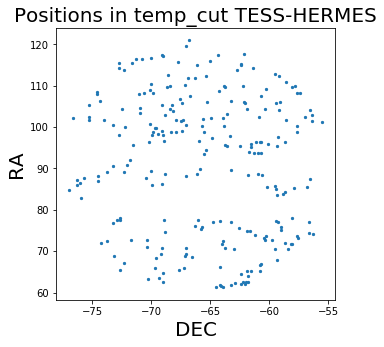

In [4]:
#hermes

plt.figure(figsize=(5,5))
plt.scatter(h_dec, h_ra,s=5)
plt.xlabel('DEC',size=20)
plt.ylabel('RA',size=20)
plt.title('Positions in temp_cut TESS-HERMES',size =20)
#try to add a colorbar for temps

In [5]:
#MAST 2nd dl

mast_file = pd.read_csv('data/MAST_2019-09-30T1928.csv',skiprows=4)
mast_file.columns,mast_file.shape

(Index(['dataproduct_type', 'calib_level', 'obs_collection', 'obs_id',
        'target_name', 's_ra', 's_dec', 't_min', 't_max', 't_exptime',
        'wavelength_region', 'filters', 'em_min', 'em_max',
        'target_classification', 'obs_title', 't_obs_release',
        'instrument_name', 'proposal_pi', 'proposal_id', 'proposal_type',
        'project', 'sequence_number', 'provenance_name', 's_region', 'jpegURL',
        'dataURL', 'dataRights', 'mtFlag', 'srcDen', 'intentType', 'obsid',
        'objID'],
       dtype='object'), (129685, 33))

In [6]:
#defining MAST variables for easy calling
m_ra = mast_file.s_ra
m_dec = mast_file.s_dec
m_tic_bad = mast_file.target_name

mast DEC range: -55.500299 -77.99592500091799 hermes DEC range: -55.4719722222 -76.9684722222


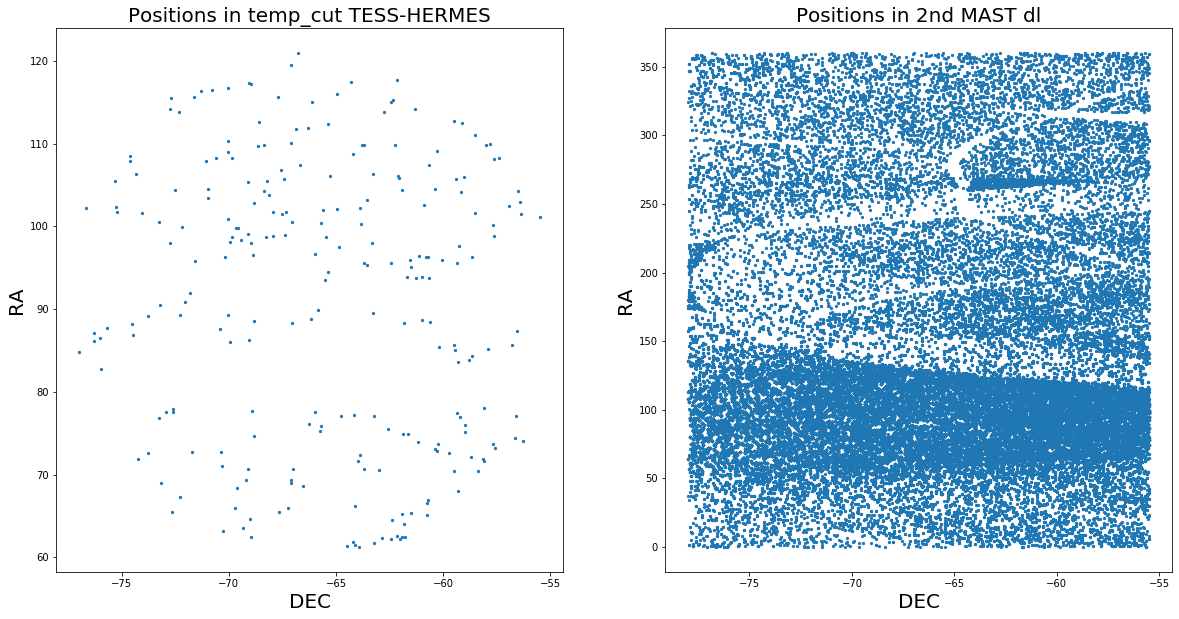

In [7]:
#plotting hermes & mast to compare

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))

#hermes
ax1.scatter(h_dec, h_ra,s=5)
ax1.set_xlabel('DEC',size=20)
ax1.set_ylabel('RA',size=20)
ax1.set_title('Positions in temp_cut TESS-HERMES',size =20)
#mast
ax2.scatter(m_dec, m_ra,s=5)
ax2.set_xlabel('DEC',size=20)
ax2.set_ylabel('RA',size=20)
ax2.set_title('Positions in 2nd MAST dl',size =20)

print('mast DEC range:',np.max(m_dec),np.min(m_dec),'hermes DEC range:',np.max(h_dec),np.min(h_dec))

# trying to match tic ids in 2nd_mast & hermes_cut

In [8]:
# #check if any matches---mast tics have ''


# for val in h_tic:
#     if val in m_tic_bad:
#         print(val)

In [9]:
# #sanity check of above matching script

# arr1 = np.array([1,2,3,4,5])
# arr2 = np.array([6,7,8,'2',3])

# for val in arr1:
#     if val in arr2:
#         print(val)

In [10]:
#gotta change mast tics from objects to intergers to do a comparison
#fixing MAST tics to not have ''


m_tic=[]
for i in m_tic_bad: 
    if i == 'TESS FFI':
        nums = np.nan
    else:
        num = int(i) #int(i)
        m_tic.append(num)
m_tic=np.array(m_tic)
m_tic

array([177254872, 142143115, 142109185, ...,  89787778, 382160308,
       463202584])

In [11]:
#check if any matches

tic_matches_list = []
for val in h_tic:
    if val in m_tic:
        #print(val)
        tic_matches_list.append(val)
tic_matches = np.array(tic_matches_list)
tic_matches.shape,tic_matches

((142,),
 array([177256886, 141526439, 141527965, 370235284, 177284607, 177254872,
        391947345, 271596225, 141542585, 141480434, 391903770, 177254154,
        140662908, 176872276, 140893722, 141685180, 140596802, 140943185,
        140971842, 177386111, 141623174, 391890293, 167089959, 177077137,
        177163235, 295072161, 294750180,  25155612, 176954932, 300159098,
        300810872, 300292272,  31508554, 167308252, 167344029, 300136240,
        370100428, 167417695, 167422188, 167338863, 231097055, 167364131,
        300868398,  29779125, 167303162, 167126073, 300243718, 300515837,
        177160343, 300243913, 167342936, 177237670, 177116487, 388130306,
        300011200, 176982916, 284194584, 167365279, 176984889, 231090784,
        300287949, 231098788, 306577886, 300036391, 231089744, 300446756,
         40601527, 150389760,  55758201, 375063025, 167600516, 150185574,
        348896748, 281631603, 150437065,  38461375, 382517990, 349194688,
         38462407,  55498515,

In [12]:
#makes sure tics in matched table are in tic_matches list

for c,i in enumerate(tic_matches):
    if i == 177254872:
        print(c,i)

5 177254872


In [13]:
type(m_tic),type(h_tic),type(m_tic_bad)

(numpy.ndarray, pandas.core.series.Series, pandas.core.series.Series)

In [14]:
#cutting MAST to match hermes

indicies=[]

for name in tic_matches:
    string = str(name)
    indicies.append(string)

matched = mast_file[mast_file.target_name.isin(indicies)]
matched


#this try helped me realize tics can appear more than once for time series
# for count,i in enumerate(m_tic):#(mast_file.target_name):
#     if i == 177256886:
#         print(count,i)

,dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,...,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
0,timeseries,3,TESS,tess2018263035959-s0003-0000000177254872-0123-s,177254872,101.714967,-75.232706,58381.533115,58408.883108,120.0,...,SPOC,CIRCLE ICRS 101.71496700 -75.23270600 0.00138889,NaN,mast:TESS/product/tess2018263035959-s0003-0000...,PUBLIC,False,NaN,science,17000073235,17000686075
6,timeseries,3,TESS,tess2018263035959-s0003-0000000177256886-0123-s,177256886,102.174214,-76.638733,58381.533115,58408.883108,120.0,...,SPOC,CIRCLE ICRS 102.17421400 -76.63873300 0.00138889,NaN,mast:TESS/product/tess2018263035959-s0003-0000...,PUBLIC,False,NaN,science,17000094724,17000686061
134,timeseries,3,TESS,tess2018263035959-s0003-0000000177386111-0123-s,177386111,104.411121,-72.497356,58381.533115,58408.883108,120.0,...,SPOC,CIRCLE ICRS 104.41112100 -72.49735600 0.00138889,NaN,mast:TESS/product/tess2018263035959-s0003-0000...,PUBLIC,False,NaN,science,17000097790,17000692838
165,timeseries,3,TESS,tess2018263035959-s0003-0000000391947345-0123-s,391947345,107.943900,-74.610300,58381.533115,58408.883108,120.0,...,SPOC,CIRCLE ICRS 107.94390000 -74.61030000 0.00138889,NaN,mast:TESS/product/tess2018263035959-s0003-0000...,PUBLIC,False,NaN,science,17000102124,17000702294
201,timeseries,3,TESS,tess2018263035959-s0003-0000000141527965-0123-s,141527965,87.714149,-75.688886,58381.533115,58408.883108,120.0,...,SPOC,CIRCLE ICRS 87.71414900 -75.68888600 0.00138889,NaN,mast:TESS/product/tess2018263035959-s0003-0000...,PUBLIC,False,NaN,science,17000094602,17000685790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129222,timeseries,3,TESS,tess2018206045859-s0001-0000000220481232-0120-s,220481232,75.958551,-59.003972,58324.792855,58352.676178,120.0,...,SPOC,CIRCLE ICRS 75.95855100 -59.00397200 0.00138889,NaN,mast:TESS/product/tess2018206045859-s0001-0000...,PUBLIC,False,NaN,science,17000014045,17002617188
129287,timeseries,3,TESS,tess2019140104343-s0012-0000000260414764-0144-s,260414764,95.541584,-59.368257,58624.448288,58652.391332,120.0,...,SPOC,CIRCLE ICRS 95.54158400 -59.36825700 0.00138889,NaN,mast:TESS/product/tess2019140104343-s0012-0000...,PUBLIC,False,NaN,science,17000436177,17002709685
129362,timeseries,3,TESS,tess2019140104343-s0012-0000000350478065-0144-s,350478065,85.635456,-56.805279,58624.448288,58652.391332,120.0,...,SPOC,CIRCLE ICRS 85.63545600 -56.80527900 0.00138889,NaN,mast:TESS/product/tess2019140104343-s0012-0000...,PUBLIC,False,NaN,science,17000424339,17002661891
129394,timeseries,3,TESS,tess2019140104343-s0012-0000000220408233-0144-s,220408233,70.442391,-59.487278,58624.448288,58652.391332,120.0,...,SPOC,CIRCLE ICRS 70.44239100 -59.48727800 0.00138889,NaN,mast:TESS/product/tess2019140104343-s0012-0000...,PUBLIC,False,NaN,science,17000430236,17002705411


In [15]:
#finding all the unique tic_ids b/c mast lists each observation separately

seen = set()
uniq = []
for x in matched.target_name:
    if x not in seen:
        uniq.append(x)
        seen.add(x)


print(len(uniq))

142


Text(0.5, 1.0, 'Positions in MAST/TESS-HERMES matches')

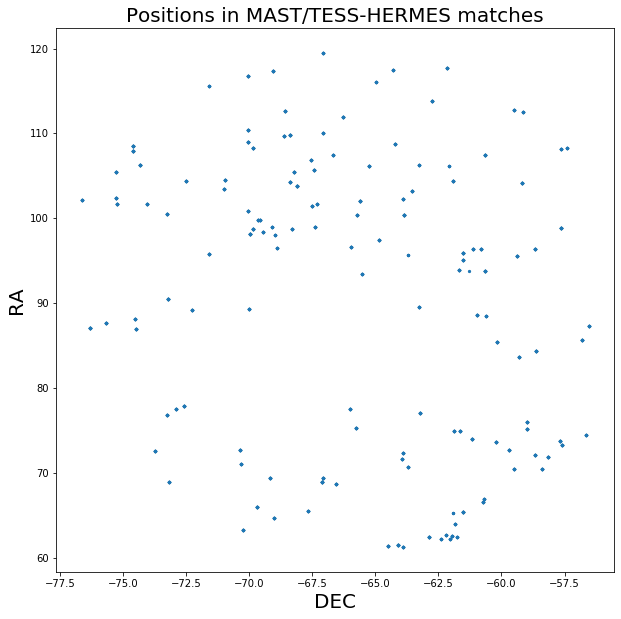

In [16]:
# plotting hermes & mast matches

matches_ra = matched.s_ra
matches_dec = matched.s_dec

plt.figure(figsize=(10,10))
plt.scatter(matches_dec, matches_ra,s=5)
plt.xlabel('DEC',size=20)
plt.ylabel('RA',size=20)
plt.title('Positions in MAST/TESS-HERMES matches',size =20)


# dl'ing lcs for tic matches

In [17]:
starnames =[]
for i in tic_matches:
    names = 'TIC ' + str(i)
    starnames.append(names)
starnames = np.array(starnames)

In [24]:


###############################################################################################

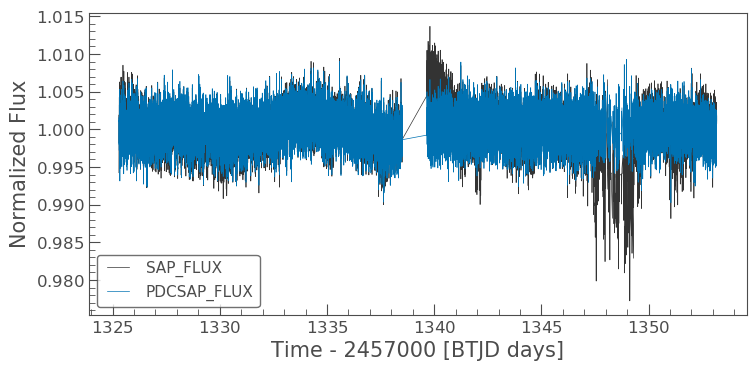

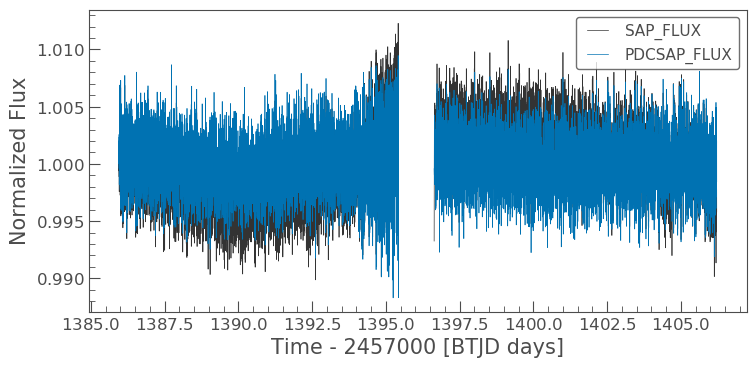

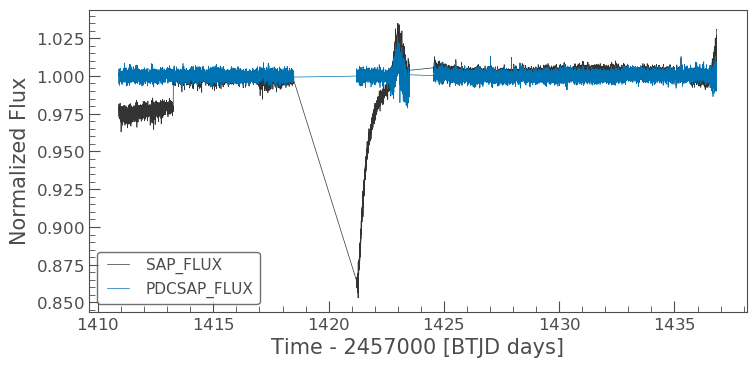

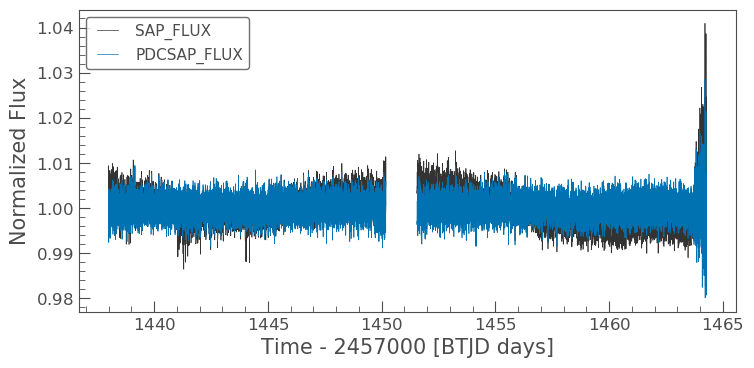

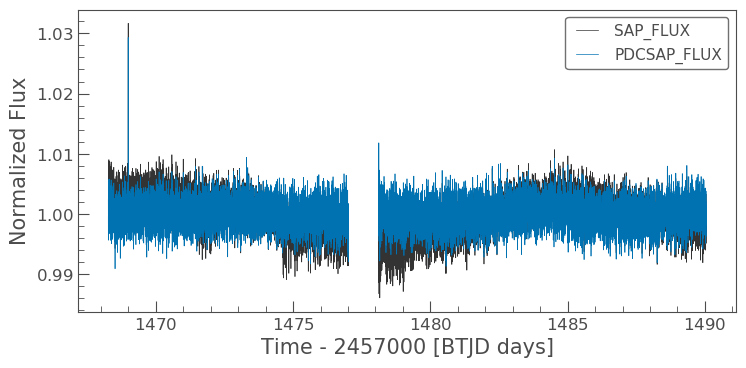

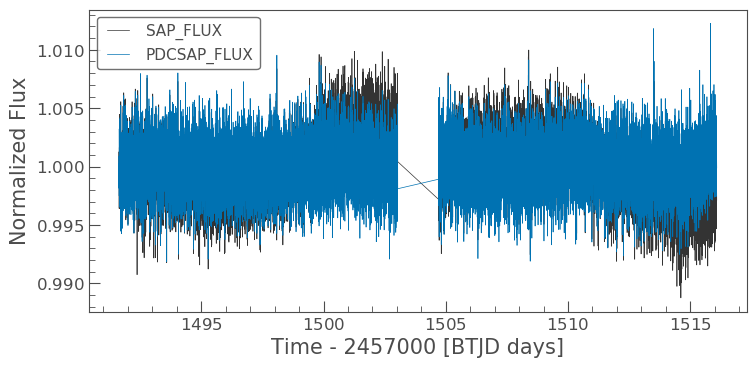

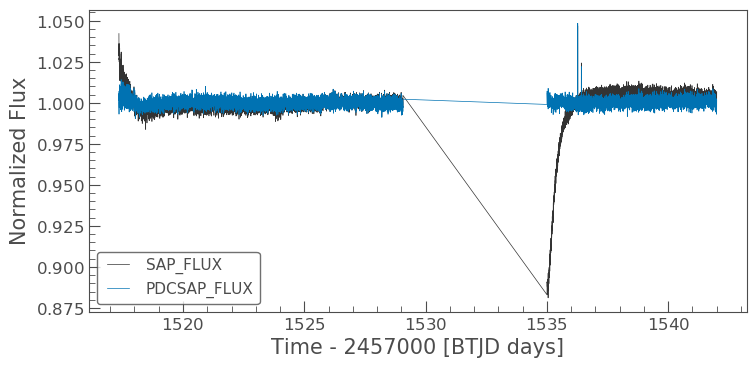

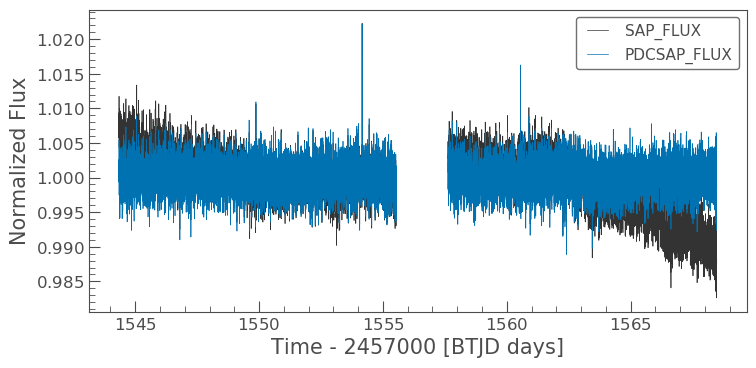

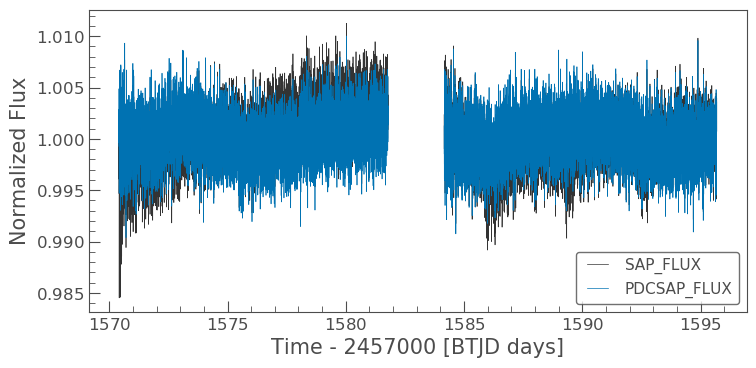

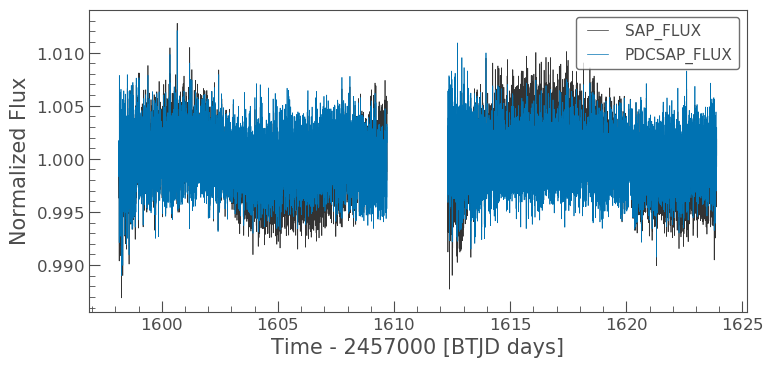

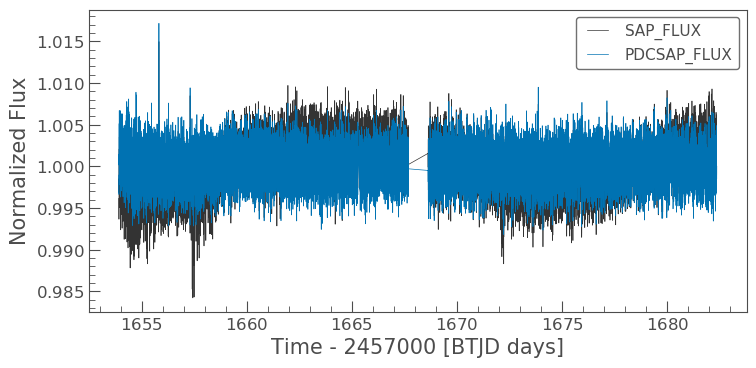

In [18]:
#dl's all lcs for ONE TARGET



lcf = lk.search_lightcurvefile(starnames[0]).download_all() #this fcn searches lightcurves, not the raw data

for i in range(len(lcf)):
    lcf[i].plot()

In [19]:
#put all data together in a table


#lk.to_table(lcf)
# lcf[0].to_table()
# print(lcf[0])
table1 = lcf[0].PDCSAP_FLUX.to_table()
table2 = lcf[1].PDCSAP_FLUX.to_table()

In [29]:
#trying to join time series


#pulling flux & time arrays to concatenate
lcf0_flux = np.array(lcf[0].PDCSAP_FLUX.flux) 
lcf0_time = np.array(lcf[0].PDCSAP_FLUX.time)
lcf1_flux = np.array(lcf[1].PDCSAP_FLUX.flux)
lcf1_time = np.array(lcf[1].PDCSAP_FLUX.time)


# #need to remove object class & make an array to concatenate

#sector0 time
time0 =[]
for i in lcf0_time:
    time0.append(i)
time0 = ','.join(map(str, time0))#adds , to list
time0 = np.fromstring(time0, dtype=float, sep=',') #makes list an array
#sector1 time
time1 =[]
for i in lcf1_time:
    time1.append(i)
time1 = ','.join(map(str, time1))
time1 = np.fromstring(time1, dtype=float, sep=',')

# #sector0 flux
# flux0 =[]
# for i in lcf0_flux:
#     flux0.append(i)
# flux0 = np.array(flux0)
# #sector1 flux
# flux1 =[]
# for i in lcf1_flux:
#     flux1.append(i)
# flux1 = np.array(flux1)    

#print(time0)

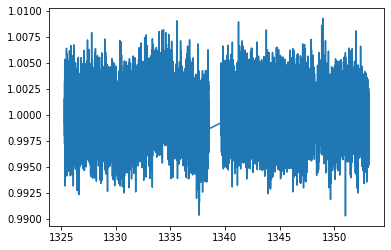

In [27]:
#normalizing data

median0 = np.median(lcf[0].PDCSAP_FLUX.flux)
normal0 = lcf[0].PDCSAP_FLUX.flux / median0
plt.plot(time0,normal0)

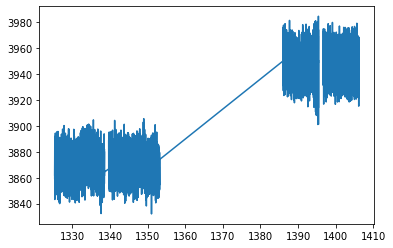

In [28]:
combine_test =lcf[0].PDCSAP_FLUX.append(lcf[1].PDCSAP_FLUX) #can combine with numpy concatenate
time_test = np.concatenate((time0,time1),axis=0)
plt.plot(time_test, combine_test.flux)
#median normalize these by dividing by the median of each lc

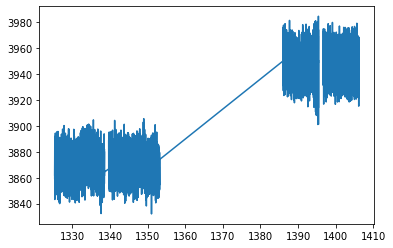

In [30]:
#shows two ways to stitch together time series

combine_test =lcf[0].PDCSAP_FLUX.append(lcf[1].PDCSAP_FLUX) #way one
time_test = np.concatenate((time0,time1),axis=0) #way two
plt.plot(time_test, combine_test.flux)

In [31]:

#print('time-series 1:',time0.shape,flux0.shape ,'time-series 2:',time1.shape,flux1.shape)

In [ ]:
#this matches output from append

# time_test = np.concatenate((time0,time1),axis=0)
# flux_test = np.concatenate((flux0,flux1),axis=0)
# print(time_test.shape,flux_test.shape)
 
# print('problem is flux data has gaps but time goes on so need to find' ,
#       'a way to keep data in table form to match times to gaps ')
# plt.plot(time_test,flux_test)

# problem above, continue here

In [ ]:
#attempted for loop for joining time series

for lc in range(len(lcf)):
    starting_lc = lcf[lc]
    next_lc = 0
    if next_lc == lc +1:
            next_lc = lc +1
            joined = np.concatenate(starting_lc, next_lc,axis=0)
    stitched.append(joined)

In [ ]:
lc2 = lcf[0].PDCSAP_FLUX.remove_nans()
lsp = lc2.to_periodogram(method='lombscargle',freq_unit=(1/u.d))
lsp.plot()

# creating custom script for bulk dl of matches

In [ ]:
tic_matches
#!/bin/sh
#curl -C - -L -o tess2018206045859-s0001-0000000033877176-0120-s_lc.fits 
# https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2018206045859-s0001-0000000033877176-0120-s_lc.fits

In [ ]:
#sector2
#!/bin/sh
curl -C - -L -o tess2018234235059-s0002-0000000041361844-0121-s_lc.fits 
#https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2018234235059-s0002-0000000041361844-0121-s_lc.fits

        
#sector1
#!/bin/sh
curl -C - -L -o tess2018206045859-s0001-0000000033877176-0120-s_lc.fits 
#https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2018206045859-s0001-0000000033877176-0120-s_lc.fits


In [32]:
#middlestr = str(mast_file['obs_id']) +'_lc.fits '
curlscript = []
for i in range(len(mast_file)):
    firststr = 'curl -C - -L -o '
    middlestr = str(mast_file['obs_id'][i]) +'_lc.fits '
    webaddy = "https://mast.stsci.edu/api/v0.1/Download/file/?uri=" 
    laststr = webaddy +str(mast_file['dataURL'][i])
    script = firststr + middlestr + laststr 
    #print(script)
    curlscript.append(script)
curlscript=np.array(curlscript)
curlscript.shape
#np.savetxt('customcurl.txt',curlscript)


(129685,)

In [33]:
curlscript[0]

'curl -C - -L -o tess2018263035959-s0003-0000000177254872-0123-s_lc.fits https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2018263035959-s0003-0000000177254872-0123-s_lc.fits'

In [37]:
#didnt work
#trying to dl all lcs via terminal in notebook commands b/c cant make a .sh file 

for count,script in enumerate(curlscript):
    print(count)#,script)
    ! script
    break

0
Script started, output file is typescript
bash-3.2$ 
bash-3.2$ 
bash-3.2$ 

In [43]:
#this works!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


with open ('data/LightCurves/customcurl.sh', 'w') as rsh:
    for count,script in enumerate(curlscript):
        rsh.write('''\
#! /bin/bash
{}
'''.format(script))


In [ ]:
#np.save('customcurl.txt',curlscript) #this works with above if in arr form
#nvermind makes it a nupmy text instead of a txt file

# for i in curlscript:
#     np.save('customcurlscript.txt',i)

# for i in curlscript:


#     fh = open("customcurl.txt", "w") 
#     fh.write("{}"format.i) 
#     fh.close 
#     print(i)
#     break


In [ ]:
for i in range(len(mast_file)):
    print(mast_file['obs_id'][i])
    break

In [ ]:
testfile = open('customcurl2.')
testfile

# checking for matches in sector 1 lightcurves

In [ ]:
for i in matched.target_name:
    i = str(i)
    ! find ~/Desktop/tess_sector1 -name '*'+i+'-0120-s_lc.fits'

# sector 1 lightcurves

In [ ]:
#a random lc file from sector1

lc = fits.open('tess2018206045859-s0001-0000000008196402-0120-s_lc.fits')